In [21]:
#Задание 1 Анализ покупок по каждому клиенту (метод оплаты, общие траты, сумма на доп)
import pandas as pd
#Загрухка данных
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
#Преобразовать Total  в числовой формат
df ['Total Price'] = pd.to_numeric(df['Total Price'], errors='coerce')
#Группировка
customer_summary = df.groupby('Customer ID').agg(Payment_Method=('Payment Method', 'first'),
                                                 total_spent=('Total Price', 'sum'),
                                                 accessories_services_spent=('Add-on Total', 'sum')).reset_index()
print(customer_summary)                                          

       Customer ID Payment_Method  total_spent  accessories_services_spent
0             1000    Credit Card      6279.42                       66.30
1             1002    Credit Card      5020.60                       60.16
2             1003           Cash        41.50                       35.56
3             1004    Credit Card        83.00                       65.78
4             1005         Paypal     11779.11                       75.33
...            ...            ...          ...                         ...
12131        19994  Bank Transfer      5504.87                       93.17
12132        19995    Credit Card      5394.56                        0.00
12133        19996         PayPal     27296.78                      432.12
12134        19997  Bank Transfer      2528.26                      101.34
12135        19998  Bank Transfer       674.32                        0.00

[12136 rows x 4 columns]


In [15]:
import pandas as pd
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased',
       'Add-on Total'],
      dtype='object')


In [17]:
print(df['Customer ID'].unique())

[ 1000  1002  1003 ... 19996 19997 19998]


In [22]:
#Задание 2
#Задание 2.1 Доход по каждому типу доставки
shipping_type_income = df.groupby('Shipping Type').agg(revenue=('Total Price', 'sum')).reset_index()
print(shipping_type_income)

  Shipping Type      revenue
0     Expedited  12437526.21
1       Express   8685215.62
2     Overnight   8704828.17
3      Same Day  12432024.82
4      Standard  21343073.55


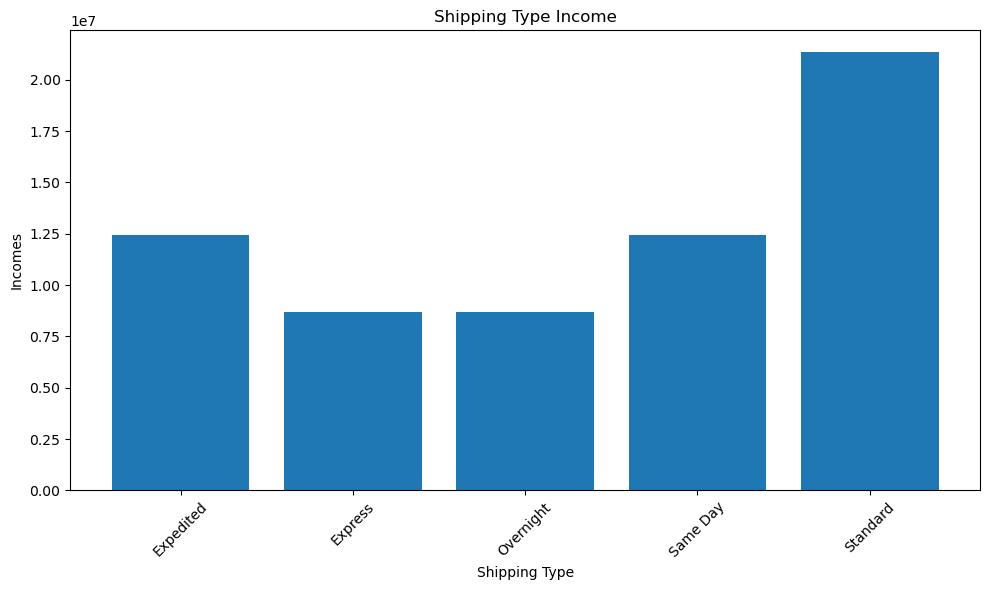

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(shipping_type_income['Shipping Type'], shipping_type_income['revenue'])
plt.title('Shipping Type Income')
plt.xlabel('Shipping Type')
plt.ylabel('Incomes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#Задание 2.2 Доход по каждому типу продукта
product_type = df.groupby('Product Type').agg(revenue=('Total Price', 'sum')).reset_index()
print(product_type)


  Product Type      revenue
0   Headphones   4041400.24
1       Laptop  12296239.97
2   Smartphone  21516754.69
3   Smartwatch  14036273.06
4       Tablet  11712000.41


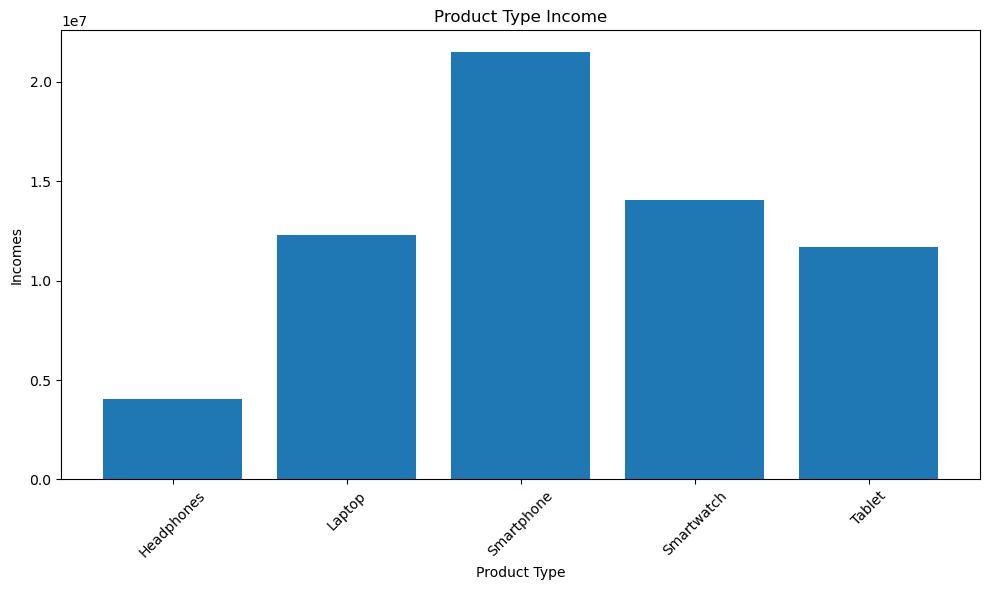

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(product_type['Product Type'], product_type['revenue'])
plt.title('Product Type Income')
plt.xlabel('Product Type')
plt.ylabel('Incomes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
#Задание 2.3 Доход по доп услугам за каждый месяц
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
df['YearMonth'] = df['Purchase Date'].dt.to_period('M')
add_ons_income_monthly = df.groupby(['YearMonth', 'Add-ons Purchased']).agg(revenue=('Total Price', 'sum')).reset_index()
print(add_ons_income_monthly)

    YearMonth                            Add-ons Purchased   revenue
0     2023-09                                    Accessory  58932.33
1     2023-09                          Accessory,Accessory  14023.04
2     2023-09                Accessory,Accessory,Accessory   6183.56
3     2023-09             Accessory,Accessory,Impulse Item   5408.55
4     2023-09                  Accessory,Extended Warranty  16917.59
..        ...                                          ...       ...
820   2024-09  Impulse Item,Extended Warranty,Impulse Item  19089.74
821   2024-09                    Impulse Item,Impulse Item  29783.61
822   2024-09          Impulse Item,Impulse Item,Accessory  27525.55
823   2024-09  Impulse Item,Impulse Item,Extended Warranty  11767.65
824   2024-09       Impulse Item,Impulse Item,Impulse Item  27107.14

[825 rows x 3 columns]


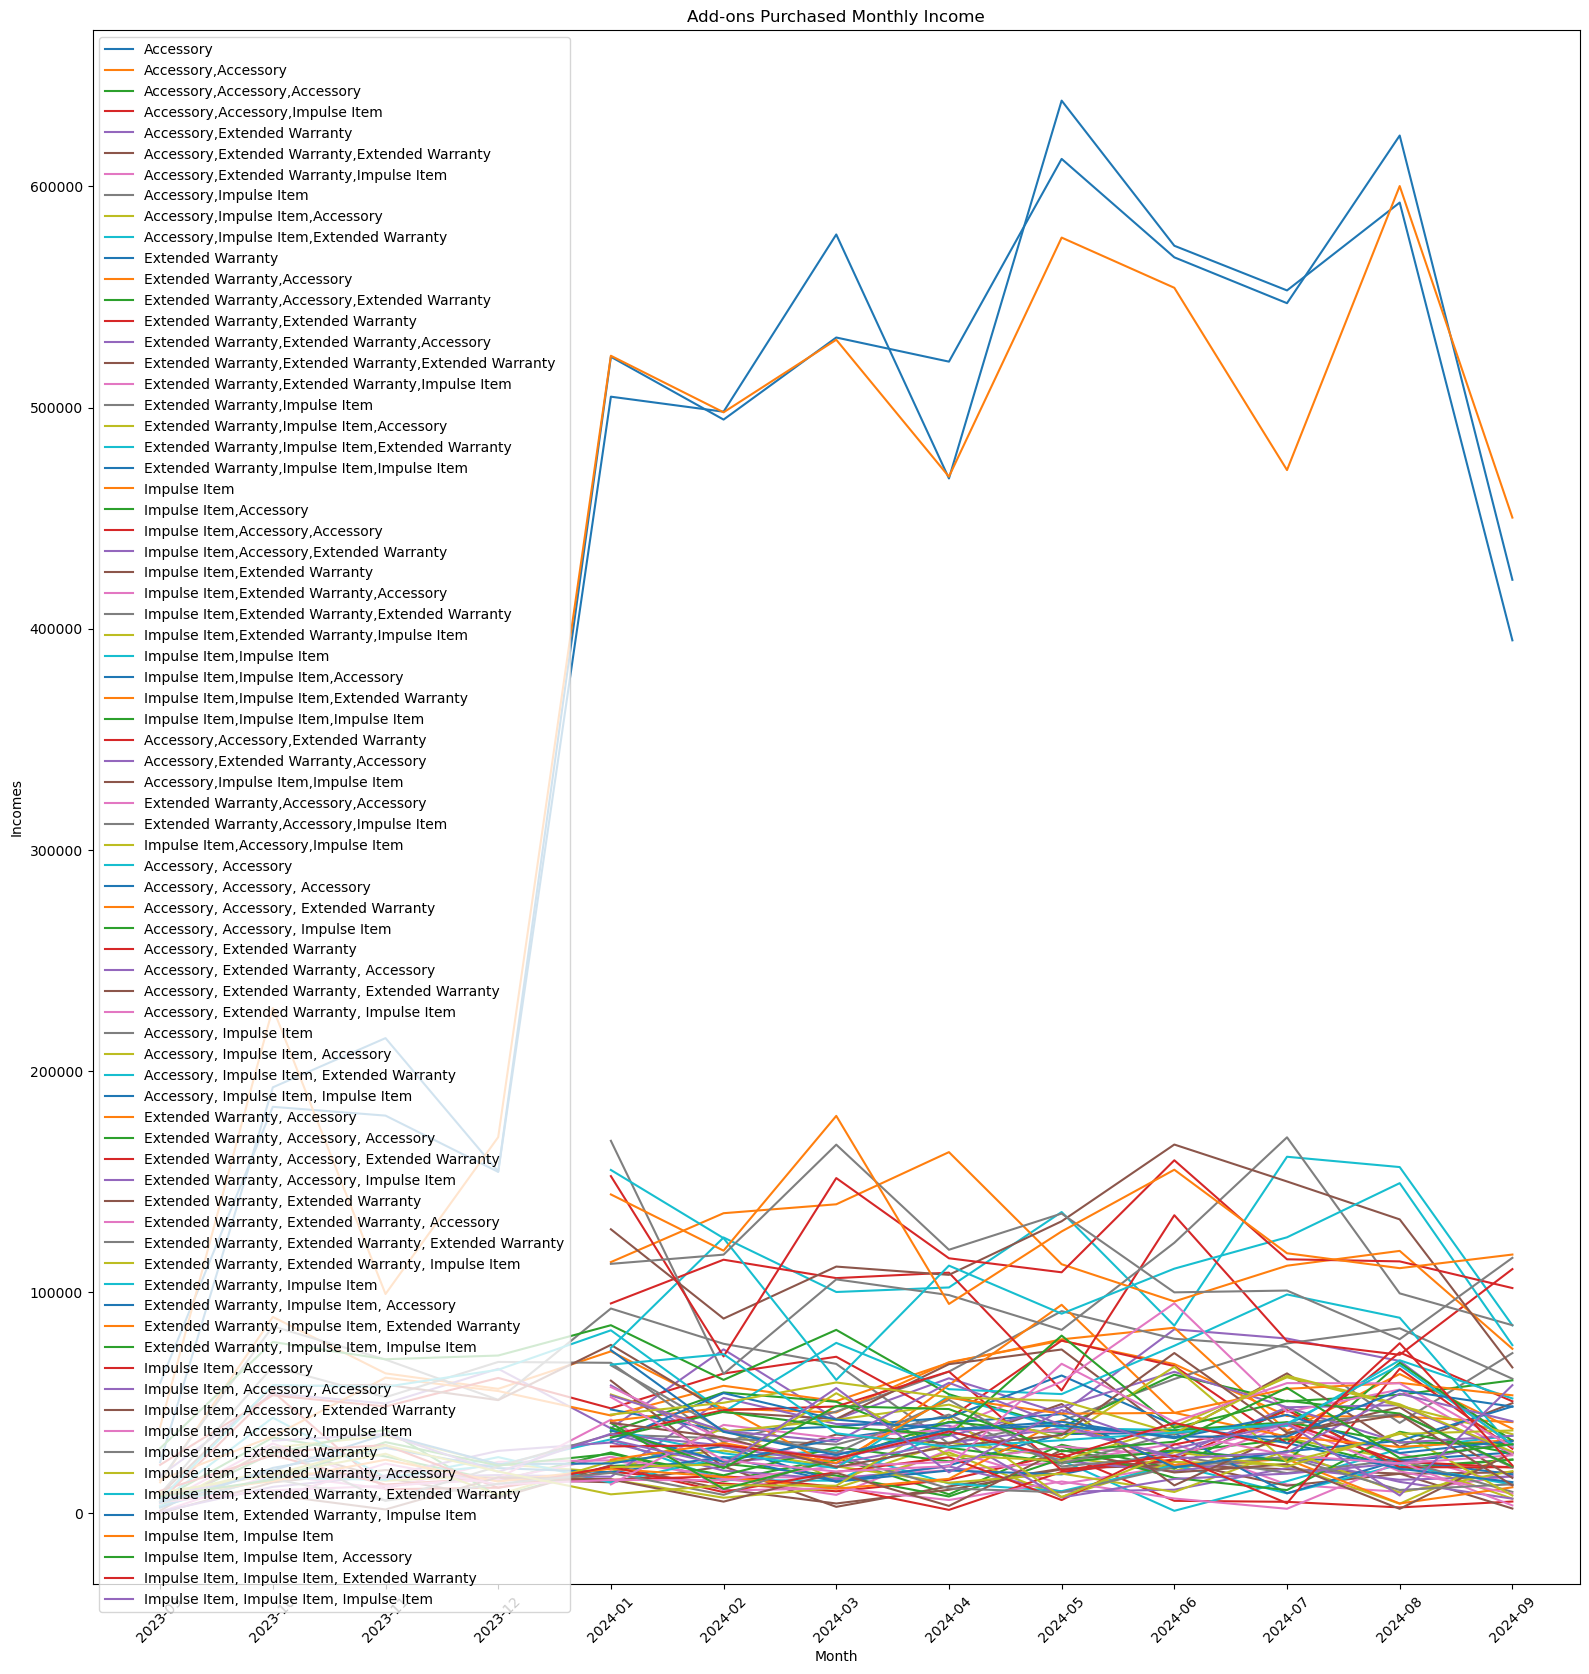

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 18))
for service in add_ons_income_monthly['Add-ons Purchased'].unique():
    service_data = add_ons_income_monthly[add_ons_income_monthly['Add-ons Purchased'] == service]
    plt.plot(service_data['YearMonth'].astype(str),service_data['revenue'], label=service)
plt.title('Add-ons Purchased Monthly Income')
plt.xlabel('Month')
plt.ylabel('Incomes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
#Задание 2.4 Доход по доп услугам за каждый квартал
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')
add_ons_income_quarter = df.groupby(['Quarter', 'Add-ons Purchased']).agg(revenue=('Total Price', 'sum')).reset_index()
print(add_ons_income_quarter)

    Quarter                            Add-ons Purchased    revenue
0    2023Q3                                    Accessory   58932.33
1    2023Q3                          Accessory,Accessory   14023.04
2    2023Q3                Accessory,Accessory,Accessory    6183.56
3    2023Q3             Accessory,Accessory,Impulse Item    5408.55
4    2023Q3                  Accessory,Extended Warranty   16917.59
..      ...                                          ...        ...
292  2024Q3  Impulse Item,Extended Warranty,Impulse Item   56958.78
293  2024Q3                    Impulse Item,Impulse Item  217175.16
294  2024Q3          Impulse Item,Impulse Item,Accessory   60568.47
295  2024Q3  Impulse Item,Impulse Item,Extended Warranty   40666.80
296  2024Q3       Impulse Item,Impulse Item,Impulse Item   74492.32

[297 rows x 3 columns]


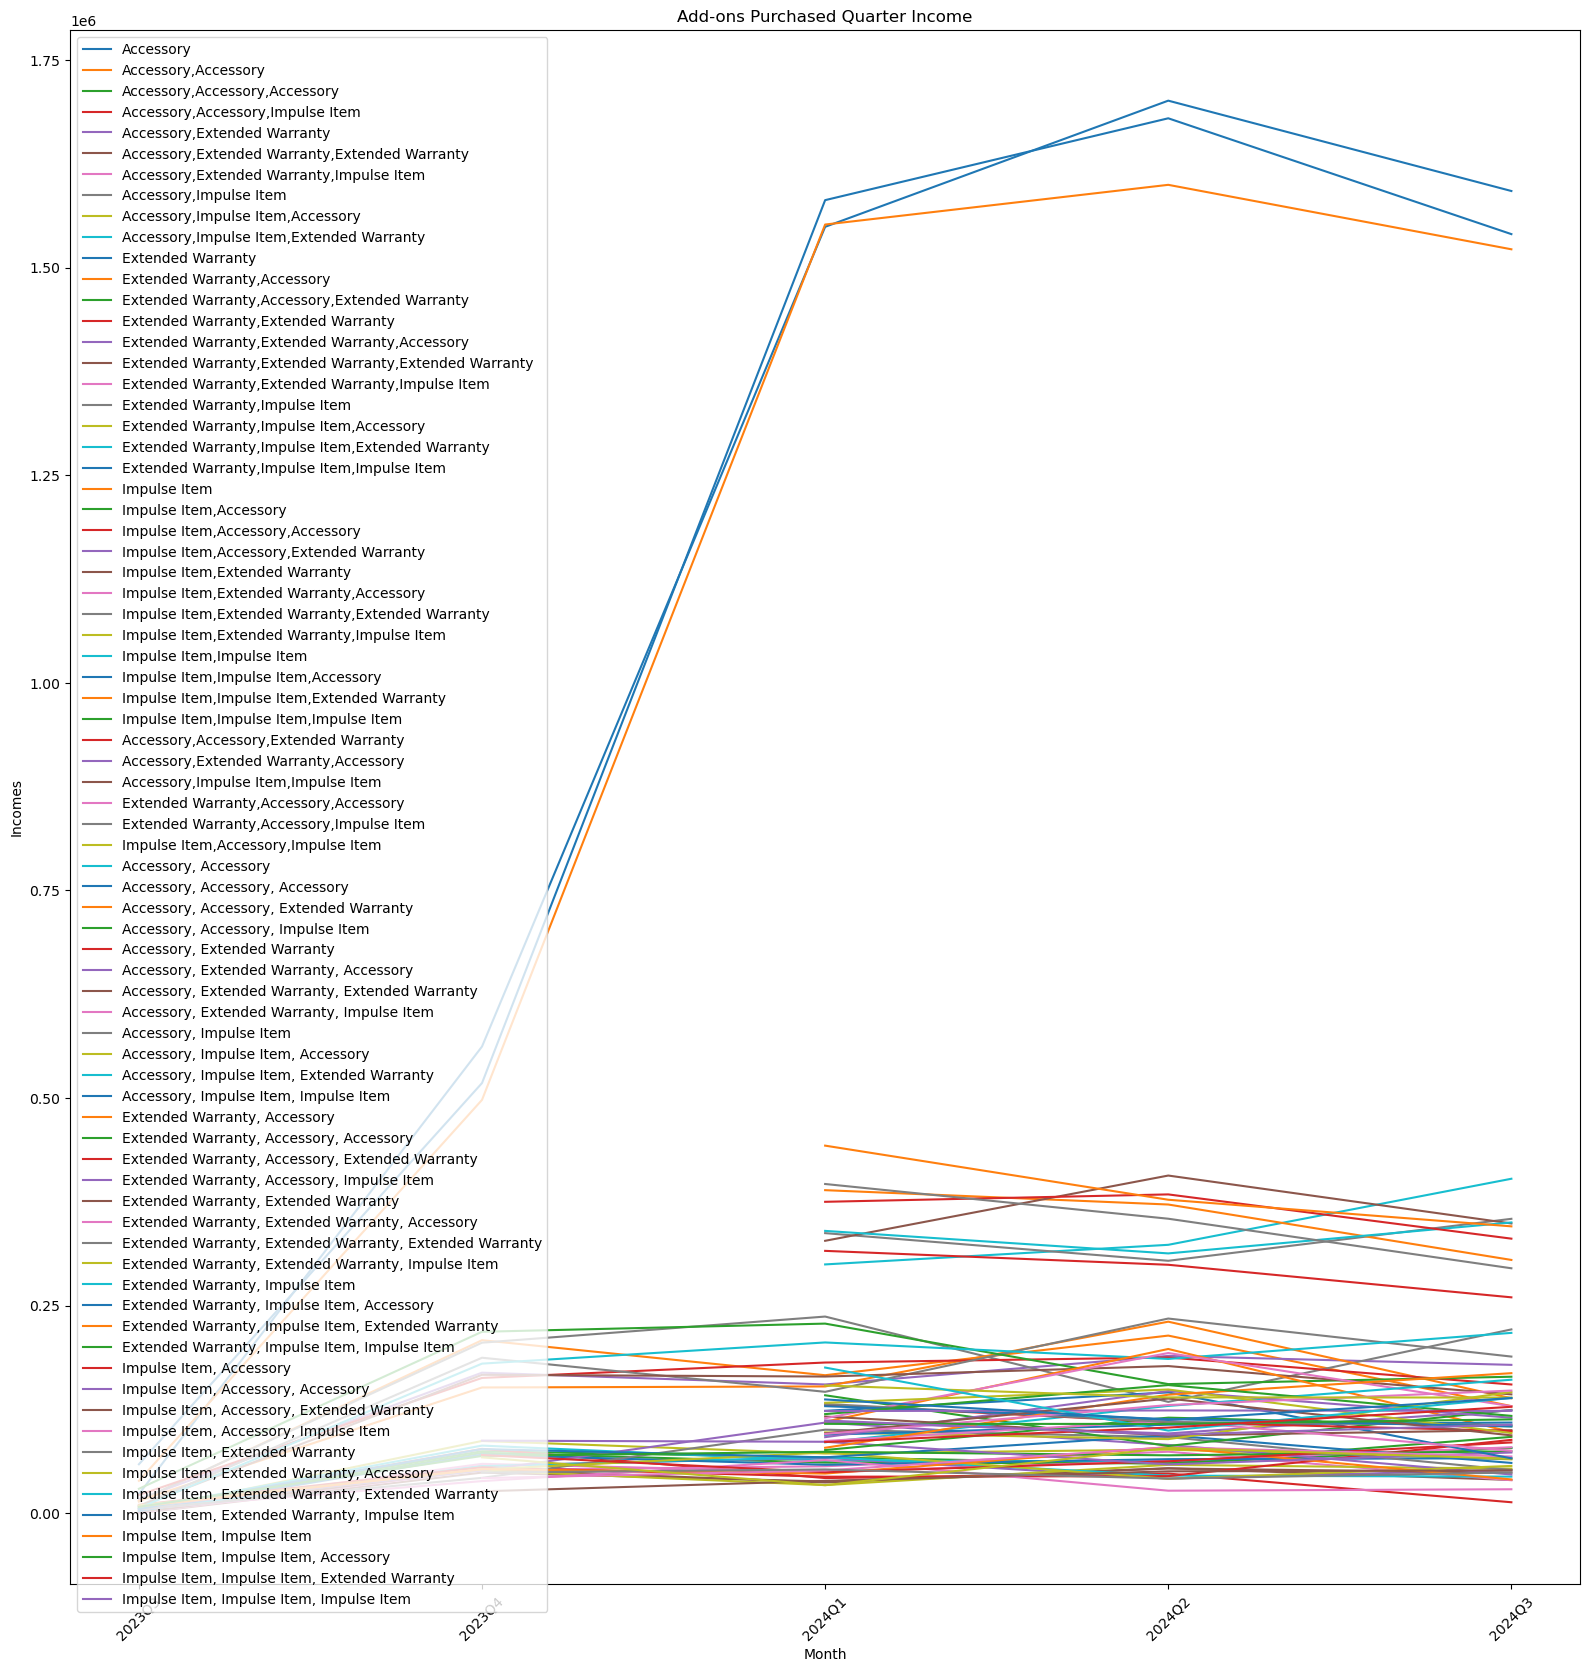

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 18))
for service in add_ons_income_quarter['Add-ons Purchased'].unique():
    service_data = add_ons_income_quarter[add_ons_income_quarter['Add-ons Purchased'] == service]
    plt.plot(service_data['Quarter'].astype(str),service_data['revenue'], label=service)
plt.title('Add-ons Purchased Quarter Income')
plt.xlabel('Month')
plt.ylabel('Incomes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()